## 예제

1. test.csv 폴더에 있는 '유통+업종(백화점,+할인점,+슈퍼마켓,+편의점)+카드소비트렌드+데이터_1901_2109'파일을 로드 
2. 각 컬럼의 이름을 ['기준연월', '업종', '성별', '연령대', '총이용건수', '총이용금액']
3. 기준년월을 시계열데이터로 변경
4. 성별 컬럼의 데이터를 1은 남자, 2는 여자로 변경, 9는 무관
5. 남, 녀 성별을 기준으로 연도별 건당 이용금액의 평균이 몇인지 출력


In [116]:
import pandas as pd
import numpy as np

In [117]:
# pd.read_csv('../test_csv/유통+업종(백화점,+할인점,+슈퍼마켓,+편의점)+카드소비트렌드+데이터_1901_2109.csv') #한글파일 오류 뜸

In [118]:
_df = pd.read_csv('../test_csv/유통+업종(백화점,+할인점,+슈퍼마켓,+편의점)+카드소비트렌드+데이터_1901_2109.csv', encoding='euc-kr') # 엔진바꿔준대, 한글읽으려고
_df

,crym,tco_btc_nm,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,백화점,1,1,1,7600.000000
1,201901,백화점,1,10,379,19458720.000000
2,201901,백화점,1,20,45173,4747711001.000000
3,201901,백화점,1,30,271858,27918261543.000000
4,201901,백화점,1,40,391109,37911486656.000000
...,...,...,...,...,...,...
2643,202109,편의점,2,50,844081,6283353303.000000
2644,202109,편의점,2,60,243768,1997441975.000000
2645,202109,편의점,2,70,40523,352420260.000000
2646,202109,편의점,2,80,6349,53334882.000000


In [119]:
_df.columns = ['기준연월', '업종', '성별', '연령대', '총이용건수', '총이용금액']
_df.columns

Index(['기준연월', '업종', '성별', '연령대', '총이용건수', '총이용금액'], dtype='object')

In [120]:
_df['기준연월'] = pd.to_datetime(_df['기준연월'], format = '%Y%m')

In [121]:
_df['성별'].replace({1 : '남자',
                   2 : '여자',
                   9 : '무관'})

0       남자
1       남자
2       남자
3       남자
4       남자
        ..
2643    여자
2644    여자
2645    여자
2646    여자
2647    여자
Name: 성별, Length: 2648, dtype: object

In [122]:
_df['성별'].value_counts()

2    1336
1    1312
Name: 성별, dtype: int64

In [123]:
# 성별 기준 연도별 건당 이용금액 평균
# 건당 이용금액

_df['건당이용금액'] = _df['총이용금액'] / _df['총이용건수']

In [124]:
_df.head(1)

,기준연월,업종,성별,연령대,총이용건수,총이용금액,건당이용금액
0,2019-01-01,백화점,1,1,1,7600.000000,7600.000000


In [125]:
# 성별기준 건당 이용금액

_df[['성별', '건당이용금액']].groupby('성별').mean()

,건당이용금액
성별,
1,43069.005758
2,40690.217796


In [126]:
# Moon_sol 

df = pd.read_csv('../test_csv/유통+업종(백화점,+할인점,+슈퍼마켓,+편의점)+카드소비트렌드+데이터_1901_2109.csv', encoding='euc-kr')

In [127]:
df.columns = ['기준연월', '업종', '성별', '연령대', '총이용건수', '총이용금액']

In [128]:
df #총이용금액 지수표현 바꿀 수 있을까 

,기준연월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7600.000000
1,201901,백화점,1,10,379,19458720.000000
2,201901,백화점,1,20,45173,4747711001.000000
3,201901,백화점,1,30,271858,27918261543.000000
4,201901,백화점,1,40,391109,37911486656.000000
...,...,...,...,...,...,...
2643,202109,편의점,2,50,844081,6283353303.000000
2644,202109,편의점,2,60,243768,1997441975.000000
2645,202109,편의점,2,70,40523,352420260.000000
2646,202109,편의점,2,80,6349,53334882.000000


In [129]:
# 판다스에서 지수표현 없애기

pd.options.display.float_format = '{: 2f}'.format

In [130]:
df.head()

,기준연월,업종,성별,연령대,총이용건수,총이용금액
0,201901,백화점,1,1,1,7600.000000
1,201901,백화점,1,10,379,19458720.000000
2,201901,백화점,1,20,45173,4747711001.000000
3,201901,백화점,1,30,271858,27918261543.000000
4,201901,백화점,1,40,391109,37911486656.000000


In [131]:
# 기준연월 데이터 -> 시계열 데이터로 변경

df['기준연월'] = pd.to_datetime(df['기준연월'], format = '%Y%m') 

In [132]:
df.head()

,기준연월,업종,성별,연령대,총이용건수,총이용금액
0,2019-01-01,백화점,1,1,1,7600.000000
1,2019-01-01,백화점,1,10,379,19458720.000000
2,2019-01-01,백화점,1,20,45173,4747711001.000000
3,2019-01-01,백화점,1,30,271858,27918261543.000000
4,2019-01-01,백화점,1,40,391109,37911486656.000000


In [133]:
# 인덱스를 기준년월로  설정 

df.set_index('기준연월', inplace = True)

In [134]:
# 괴상한 데이터
df['연령대'].value_counts()

10    264
20    264
30    264
40    264
50    264
60    264
70    264
80    264
90    264
0     233
1      39
Name: 연령대, dtype: int64

In [135]:
# 성별 컬럼에서 1은 남자, 2는 여자, 9는 무관 - 방법은 여러가지 

# Case I. apply() 

def change(x) : 
    if x == 1 :
        result = '남자'
    elif x == 2 :
        result = '여자'
    elif x == 9 :
        result = '무관'
    else :
        result = '-'
    return result

# df['성별'].apply(change)
df['성별'].apply(change).value_counts()


여자    1336
남자    1312
Name: 성별, dtype: int64

In [136]:
# Case II. lambda()

df['성별'].apply(lambda x : '남자' if (x == 1) else ('여자' if (x == 2) else "무관"))

기준연월
2019-01-01    남자
2019-01-01    남자
2019-01-01    남자
2019-01-01    남자
2019-01-01    남자
              ..
2021-09-01    여자
2021-09-01    여자
2021-09-01    여자
2021-09-01    여자
2021-09-01    여자
Name: 성별, Length: 2648, dtype: object

In [137]:
# Case III. replace()

df['성별'] = df['성별'].replace(
    {
    1 : '남자',
    2 : '여자',
    9 : '무관'
    }
)

In [138]:
df['성별']

기준연월
2019-01-01    남자
2019-01-01    남자
2019-01-01    남자
2019-01-01    남자
2019-01-01    남자
              ..
2021-09-01    여자
2021-09-01    여자
2021-09-01    여자
2021-09-01    여자
2021-09-01    여자
Name: 성별, Length: 2648, dtype: object

In [139]:
#남녀 성별을 기준으로 연도별 건당 이용금액의 평균이 몇인지 

#연도 파생변수 생성

df['연도'] = df.index.strftime('%Y')

In [140]:
df.head()

,업종,성별,연령대,총이용건수,총이용금액,연도
기준연월,,,,,,
2019-01-01,백화점,남자,1,1,7600.000000,2019
2019-01-01,백화점,남자,10,379,19458720.000000,2019
2019-01-01,백화점,남자,20,45173,4747711001.000000,2019
2019-01-01,백화점,남자,30,271858,27918261543.000000,2019
2019-01-01,백화점,남자,40,391109,37911486656.000000,2019


In [141]:
# 건당 이용금액 파생변수 생성
# 총이용 금액 / 총이용 건수 

df['건당이용금액'] = df['총이용금액'] / df['총이용건수']

df.head()

,업종,성별,연령대,총이용건수,총이용금액,연도,건당이용금액
기준연월,,,,,,,
2019-01-01,백화점,남자,1,1,7600.000000,2019,7600.000000
2019-01-01,백화점,남자,10,379,19458720.000000,2019,51342.269129
2019-01-01,백화점,남자,20,45173,4747711001.000000,2019,105100.635357
2019-01-01,백화점,남자,30,271858,27918261543.000000,2019,102694.279892
2019-01-01,백화점,남자,40,391109,37911486656.000000,2019,96933.301601


In [142]:
import platform 

In [143]:
import matplotlib.pyplot as plt

In [144]:
#그래프에서 한글 깨짐 방지(위 셀 2개 에서 불러옴)위 셀2개랑, 지금 셀은 세트로 쓰자 
import platform 
import matplotlib.pyplot as plt
if platform.system() == 'Darwin' : # MAC 인 경우
    plt.rc('font', family = 'AppleGothic')
    
else :
    plt.rc('font', family = 'Malgun Gothic')




In [145]:
df[['성별', '연도', '건당이용금액']].groupby(['연도','성별']).mean()

건당이용금액
연도   성별              
2019 남자  39184.349662
     여자  38107.838544
2020 남자  44009.589591
     여자  41389.763130
2021 남자  46948.320084
     여자  43306.318972

<Axes: xlabel='연도,성별'>

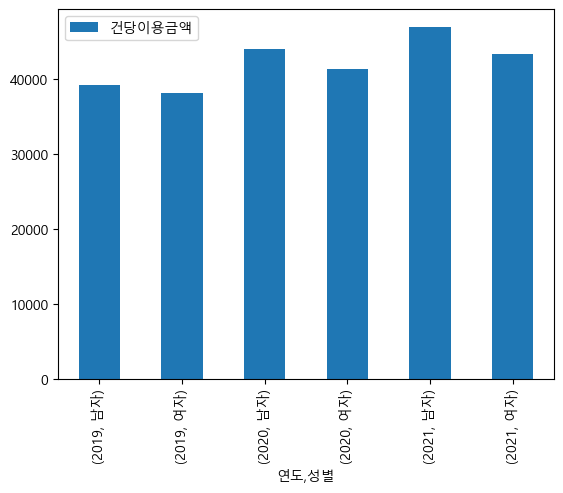

In [146]:
(df[['성별', '연도', '건당이용금액']].groupby(['연도','성별']).mean()).plot.bar()

# 밑에 그래프 보면, 한글 부분 다 깨짐 (위에서 한글깨짐 방지하기 전에는)

# 한글깨짐 방지 후에는 

In [147]:
# 피벗으로도 그래프 만들어보자 sum 만들어볼까
 
pivot = pd.pivot_table(
    df,
    index = '연도',
    columns= '성별',
    aggfunc= 'mean',
    values= '건당이용금액'
)

pivot

성별,남자,여자
연도,,
2019,39184.349662,38107.838544
2020,44009.589591,41389.763130
2021,46948.320084,43306.318972


<Axes: xlabel='연도'>

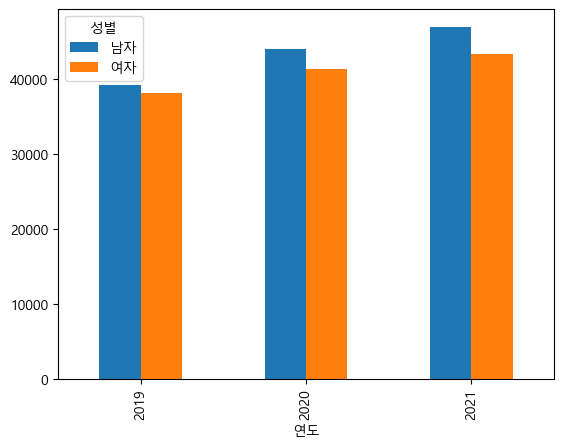

In [148]:
pivot.plot.bar()

### 온라인 카드 매출 과 오프라인 카드 매출을 월별로 비교
    - covid-19으로 인해 온,오프라인 매출 변화 있었는지 확인하기 위해

1. 오프라인 데이터 df를 월별로 그룹화 총이용금액의 합계
    - index는 기준년월을 시계열로 변경한 데이터로 설정
2. 온라인 데이터 df_online도 월별로 그룹화 총이용금액의 합계 
    - 인덱스는 기준년월을 시계열로 변경한 데이터로 설정
    
    

In [149]:
df


,업종,성별,연령대,총이용건수,총이용금액,연도,건당이용금액
기준연월,,,,,,,
2019-01-01,백화점,남자,1,1,7600.000000,2019,7600.000000
2019-01-01,백화점,남자,10,379,19458720.000000,2019,51342.269129
2019-01-01,백화점,남자,20,45173,4747711001.000000,2019,105100.635357
2019-01-01,백화점,남자,30,271858,27918261543.000000,2019,102694.279892
2019-01-01,백화점,남자,40,391109,37911486656.000000,2019,96933.301601
...,...,...,...,...,...,...,...
2021-09-01,편의점,여자,50,844081,6283353303.000000,2021,7444.016988
2021-09-01,편의점,여자,60,243768,1997441975.000000,2021,8194.028646
2021-09-01,편의점,여자,70,40523,352420260.000000,2021,8696.795894


In [150]:
group_data = df.groupby(df.index).sum()['총이용금액'] # df.index 대신 '기준연월'바로 써도 되긴 함
                                        # ['총이용금액']까지 붙이면, 데이터형태는 시리즈

C:\Users\zino0\AppData\Local\Temp\ipykernel_7372\2099672582.py:1: FutureWarning: The default value of numeric_only in DataFrameGroupBy.sum is deprecated. In a future version, numeric_only will default to False. Either specify numeric_only or select only columns which should be valid for the function.
  group_data = df.groupby(df.index).sum()['총이용금액'] # df.index 대신 '기준연월'바로 써도 되긴 함


In [151]:
df_online = pd.read_csv('../test_csv/온라인+카드소비트렌드+데이터_1901_2109.csv')

In [152]:
df_online.head()

,crym,ma_fem_dc,agegrp_dc,tco_btc_u_ct,tco_btc_u_am
0,201901,1,1,1,110685
1,201901,1,10,2333,98108225
2,201901,1,20,272915,13854081656
3,201901,1,30,1320227,82946127640
4,201901,1,40,1372052,95550848337


In [153]:
# 컬럼의 이름을 변경

df_online.columns = ['기준년월', '성별', '연령대', '총이용건수', '총이용금액']

In [154]:
# 기준년월을 시계열로 변경하고 인덱스로 설정

df_online['기준년월'] = pd.to_datetime(df_online['기준년월'], format = '%Y%m')

In [155]:
df_online.set_index('기준년월', inplace= True)

In [156]:
# 그룹화 

group_data2 = df_online.groupby('기준년월').sum()['총이용금액']

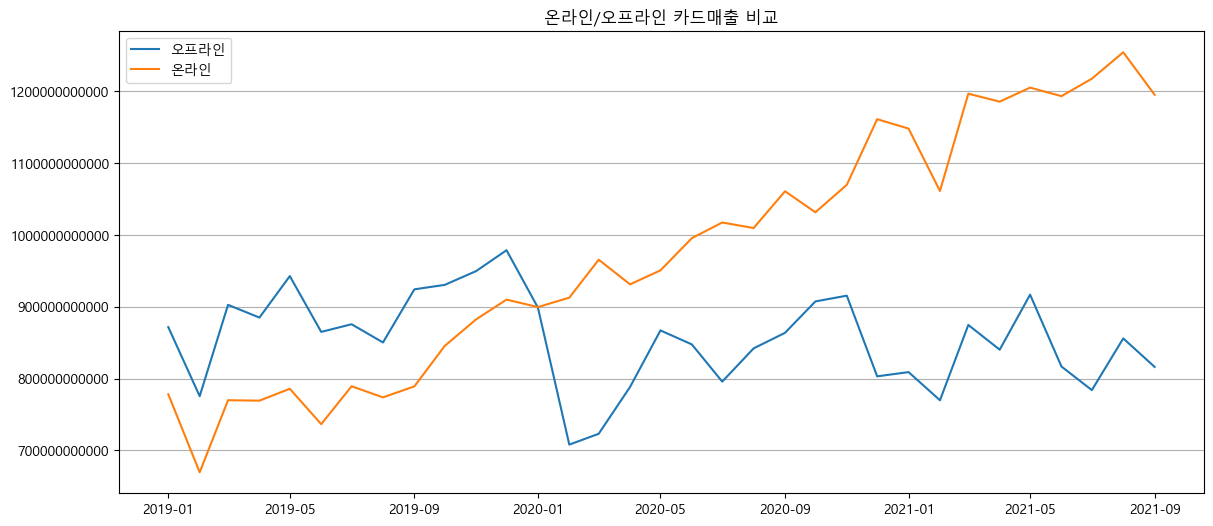

In [157]:
# 그래프로 시각화\


# 그래프 사이즈 변경
plt.figure(figsize = (14, 6))

# grid 추가
plt.grid(True, axis = 'y')

#지수표현 제거
plt.ticklabel_format(axis = 'y', style = 'plain')


plt.plot(group_data, label = '오프라인') # 라벨 안나옴. 그냥 지정만 한거야
plt.plot(group_data2, label = '온라인')
plt.title('온라인/오프라인 카드매출 비교')
plt.legend()            # 이거 해줘야, 라벨 나옴 . 


plt.show()

In [158]:
df.head(1)

,업종,성별,연령대,총이용건수,총이용금액,연도,건당이용금액
기준연월,,,,,,,
2019-01-01,백화점,남자,1,1,7600.000000,2019,7600.000000


In [159]:
df_online.head(1)

,성별,연령대,총이용건수,총이용금액
기준년월,,,,
2019-01-01,1,1,1,110685


In [160]:
# 오프라인과 온라인 합치고 싶어. 
# concat 하고 싶은데, 둘이 columns 구조가 다르자나 '업종' 유무 
# 온라인 df에 업종 컬럼을 추가해 그다음 합쳐보자. 

df_online['업종'] = '온라인'

In [163]:
total_df = pd.concat([df,df_online], axis = 'rows')
total_df



,업종,성별,연령대,총이용건수,총이용금액,연도,건당이용금액
2019-01-01,백화점,남자,1,1,7600.000000,2019,7600.000000
2019-01-01,백화점,남자,10,379,19458720.000000,2019,51342.269129
2019-01-01,백화점,남자,20,45173,4747711001.000000,2019,105100.635357
2019-01-01,백화점,남자,30,271858,27918261543.000000,2019,102694.279892
2019-01-01,백화점,남자,40,391109,37911486656.000000,2019,96933.301601
...,...,...,...,...,...,...,...
2021-09-01,온라인,2,50,3237324,181360535814.000000,NaN,NaN
2021-09-01,온라인,2,60,1019719,70026626874.000000,NaN,NaN
2021-09-01,온라인,2,70,159261,13091029631.000000,NaN,NaN
2021-09-01,온라인,2,80,20094,1935122483.000000,NaN,NaN


In [164]:
total_df['업종'].value_counts()

편의점     667
백화점     664
슈퍼마켓    663
할인점     654
온라인     651
Name: 업종, dtype: int64